# Laporan Proyek Machine Learning - Rizki Wahyu Nurcahyani Fajarwati 
- **Nama:** Rizki Wahyu Nurcahyani Fajawrati
- **Email:** a123xbf441@devacademy.id
- **ID Dicoding:** a123xbf441

## Import Semua Packages/Library yang Digunakan

Dalam mengerjakan proyek ini, langkah awalnyaadalah mengimpor semua library yang diperlukan. Library-library ini digunakan untuk berbagai keperluan seperti:
- manipulasi data (pandas, numpy),
- visualisasi data (matplotlib, seaborn),
- preprocessing menggunakan TF-IDF dan matriks menggunakan cosine similiarity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Data Understanding

#### Informasi Dataset
Dataset Netflix Movies and TV Shows merupakan dataset yang berasal dari kaggle, dengan link berikut : https://www.kaggle.com/datasets/shivamb/netflix-shows. Dataset ini kemudian saya download dan saya akses melalui komputer local dan saya simpan dengan nama netflix_titles.csv. 

Dataset ini memiliki data sebanyak 8.807 baris data serta 12 kolom dan terdapat kolom yang memiliki missing value. Selanjutnya akan dilakukan proses preprocessing, untuk mempersiapkan data agar dapat diolah menjadi sebuah sistem rekomendasi content-based filtering berdasarkan fitur listed-in. Dataset ini memiliki beberapa kolom antara lain show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in. 

Baris kode dibawah ini digunakan untuk membaca file CSV bernama netflix_titles.csv. File CSV tersebut berisi dataset list nama film yang ada di aplikasi netflix beserta dengan fitur lainnya. Hasil pembacaan disimpan dalam variabel df (dataframe). Kemudian menggunakan head() untuk menampilkan 5 baris pertama dari dataframe df. Ini berguna untuk melihat struktur awal data, seperti nama kolom, tipe data, dan isi dari beberapa baris awal.

In [2]:
df = pd.read_csv("netflix_titles.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  

#### Pengecekan Tipe Data
- Kode ini digunakan untuk mengecek atau memeriksa tipe data dari setiap kolom yang ada di variabel df, dan terdapat 2 tipe data yaitu int, dan object.
- untuk int masuk ke numerik antara lain : release_year.
- sedangkan untuk objek masuk ke kategorikal antara lain : show_id, type, title, director, cast, country, date_added, rating, duration, listed_in. 

In [3]:
data_types = df.dtypes
print(data_types)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


#### Penjelasan setiap Fitur
Descriptive merupakan fungsi yang digunakan untuk menghasilkan statistik deskriptif dari kolom-kolom numerik di dalam dataframe df.
Statistik yang ditampilkan mencakup:
- count: jumlah nilai yang tidak kosong (non-NaN),
- mean: nilai rata-rata,
- std: standar deviasi (penyebaran data),
- min: nilai minimum,
- 25%, 50%, 75%: kuartil 1, median, dan kuartil 3,
- max: nilai maksimum.

Pada data ini, terdapat 8.807 baris data, kemudian untuk penjelasannya antara lain : 
1. release_year
    - Rata-rata: 2014
    - Minimum: 1925
    - Maksimum: 2021
    - Rentang penayangan/release film ini tidak menunjukkan adanya outlier, karena rentang masih wajar, dan ketika dilihat untuk baris datanya memang benar untuk release ya tahun 1925.

2. show_id
    - ID unik untuk setiap judul yang tercantum di Netflix. Digunakan sebagai identifikasi unik.

3. type
    - Menunjukkan tipe konten untuk menandakan apakah konten berupa film atau serial TV. Tipenya antara lain : Movie dan TV Show.

4. title
    - Judul tayangan yang ada di netflix. Setiap judul biasanya unik dan menjadi identitas utama sebuah tayangan. 

5. director
    - Nama sutradara dari setiap film, banyak sutradara yang menjembatani film yang sama, dan banyak pula yang kosong(missing_value). 

6. cast
    - Daftar aktor atau aktris yang terlibat dalam tayangan. Namun beberapa terdapat data yang kosong.

7. country
    - Negara tempat produksi konten dilakukan. Isinya bisa berisi lebih dari satu negara atau kosong.

8. date_added
    - Tanggal film ditambahkan ke platform Netflix.

9. rating
    - Kategori usia yang diperbolehkan menonton tayangan. Kategori usia (TV-MA, PG, R, dll) : 
        - TV-MA	atau Mature Audience –> khusus dewasa (usia 17+), berisi kekerasan, seks, dll.
        - PG atau Parental Guidance –> butuh bimbingan orang tua untuk anak-anak.
        - R	atau Restricted –> terbatas untuk usia 17+ kecuali didampingi orang tua.
        - TV-G	atau General Audience –> aman untuk semua usia.
        - NC-17	-> Tidak cocok untuk anak-anak di bawah usia 17, meski dengan pengawasan.

10. duration
    -  Lama tayangan film atau jumlah season. untuk movie dalam satuan menit (misal: "90 min") dan untuk TV Show dalam jumlah musim (misal: "1 Season")

11. listed_in
    - Genre atau kategori tayangan. berisi multi genre yang dipisahkan oleh koma, berisi Dramas, Comedies, Action & Adventure

12. description
    -  Ringkasan atau sinopsis singkat dari konten. 

In [4]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


digunakan untuk melihat jumlah tayangan berdasarkan tahun pembuatannya/release_year

In [5]:
year_counts = df['release_year'].value_counts()
year_counts_df = year_counts.reset_index()
year_counts_df.columns = ['release_year', 'count']
grouped = year_counts_df.groupby('count')['release_year'].apply(list).reset_index()
grouped.columns = ['jumlah_tayangan', 'daftar_tahun']
grouped.tail()


,jumlah_tayangan,daftar_tahun
40,902,[2016]
41,953,[2020]
42,1030,[2019]
43,1032,[2017]
44,1147,[2018]


#### Visualisasi Data
Mengambil semua nama kolom dari dataframe df lalu menghitung berapa banyak baris dan kolom grid yang dibutuhkan agar semua fitur bisa divisualisasikan dalam 3 subplot. Kemudian membuat figure dan axes menggunakan matplotlib, lalu mengubah susunannya agar mudah diakses satu per satu. Dilakukan iterasi untuk setiap kolom dan dibuatkan histogramnya dengan judul masing-masing setiap diagramnya agar mudah untuk dibaca. 

tidak semua saya visualisasikan, dikarenakan banyak yang memiliki variabel lebih dari yang ada semisal title, atau direction sehingga sulit untuk ditampilkan. Dan berdasarkan visualisasi histogram, terdapat penjelasan seperti berikut : 
1. Distribusi dari type (Movie vs TV Show) : Jumlah Movie jauh lebih banyak dibandingkan TV Show, 
2. Distribusi dari release_year : Terdapat lonjakan signifikan pada tahun 2000 ke atas, terutama 2000–2020. Distribusi ini menunjukkan bahwa Netflix lebih banyak menambahkan konten modern dibanding konten lama. Skewed to the left (negative skew) hal ini dikarenakan mayoritas data berada di tahun-tahun baru, sedangkan data tahun lama sangat sedikit (misalnya 1925 hanya 1 data). 
3. Distribusi dari rating : Paling banyak: TV-MA, TV-14, dan PG. sehingga konten di Netflix didominasi tayangan dewasa dan remaja (TV-MA, TV-14, PG).
4. Distribusi dari duration : paling banyak adalah tayangan tv movies yang menampilkan beberapa session, namun session 1 yang paling unggul. 
5. Distribusi dari country : Film dari United States yang paling banyak ada di netflix.
6. Distribusi dari listed_in(genre) : Genre yang paling banyak adalah Dramas, International Movies

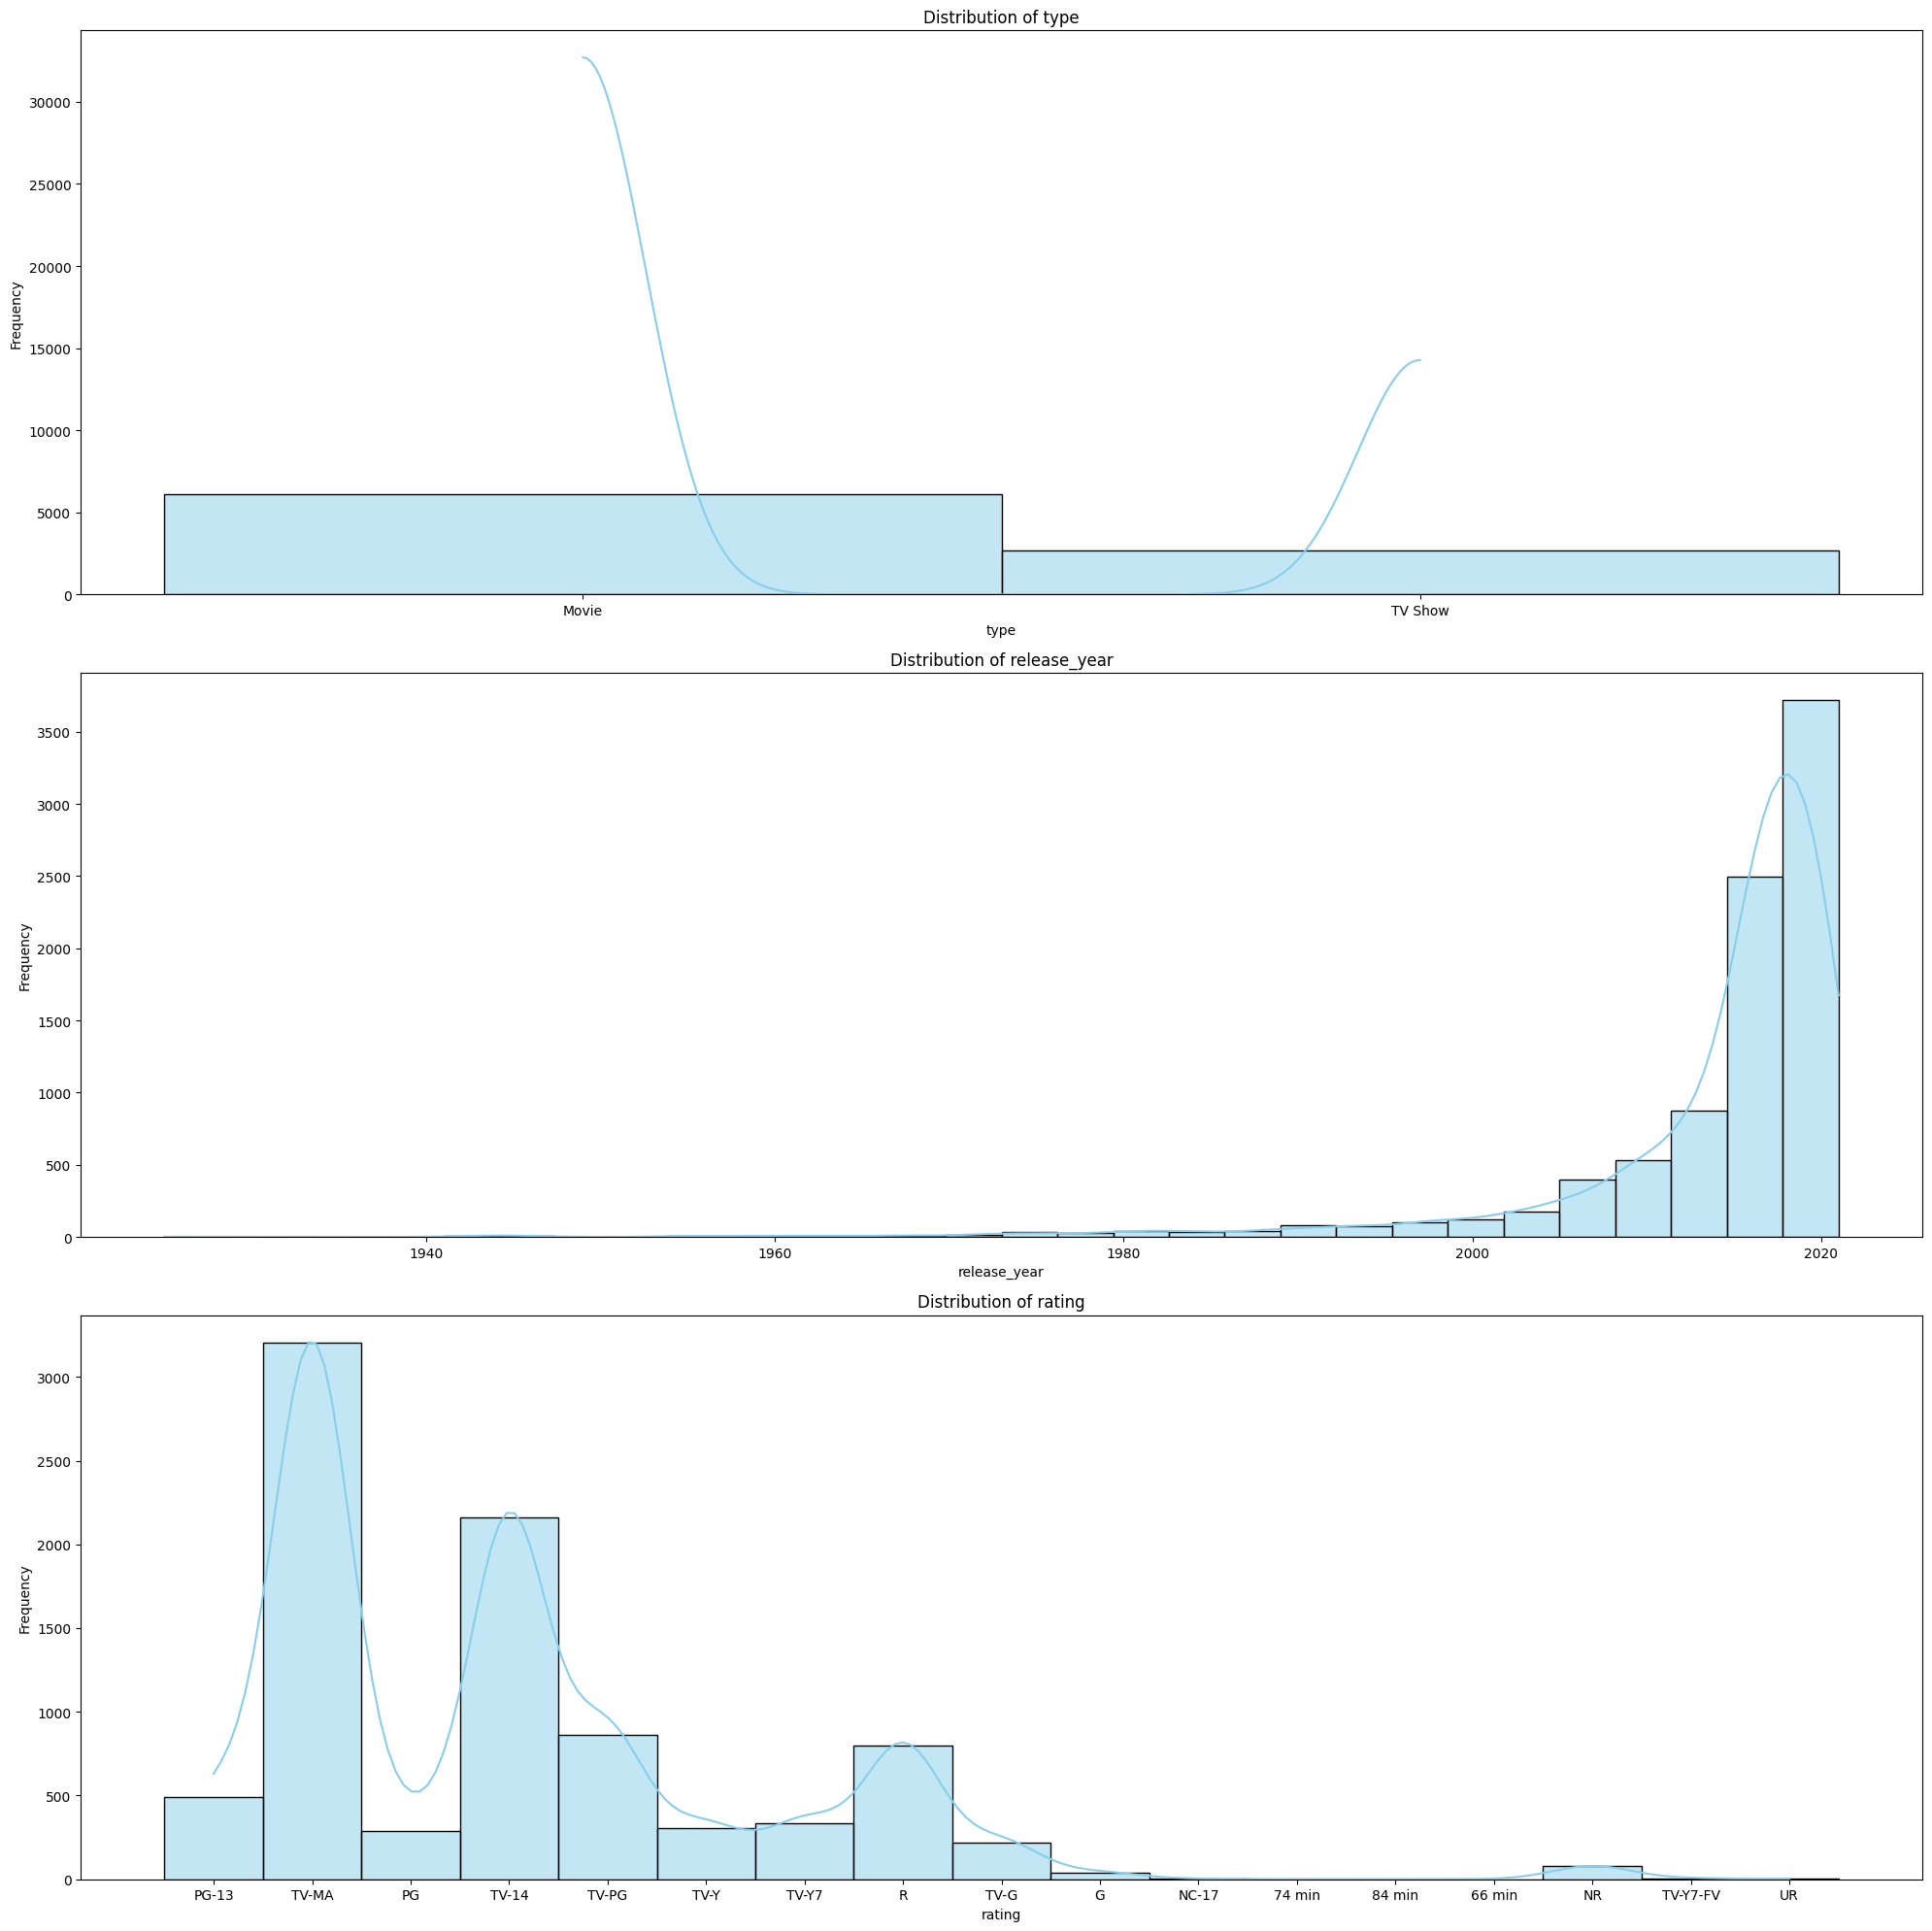

In [6]:
cols = df[['type', 'release_year', 'rating']].columns.to_list()
n_cols = 1
n_rows = -(-len(cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


digunakan untuk melihat jumlah tanyangan berdasarkan beda durasi antar beberapa film

In [7]:
duration = df['duration'].value_counts()
duration_df = duration.reset_index()
duration_df.columns = ['duration', 'count']
grouped_duration = duration_df.groupby('count')['duration'].apply(list).reset_index()
grouped_duration.columns = ['jumlah_tayangan', 'daftar_durasi']
grouped_duration.tail(10)

,jumlah_tayangan,daftar_durasi
71,122,[102 min]
72,129,[92 min]
73,130,[96 min]
74,137,[95 min]
75,144,[91 min]
76,146,"[94 min, 97 min, 93 min]"
77,152,[90 min]
78,199,[3 Seasons]
79,425,[2 Seasons]
80,1793,[1 Season]


digunakan untuk melihat jumlah tayangan berdasarkan nama negara yang ada di netflix

In [8]:
country = df['country'].value_counts()
country_df = country.reset_index()
country_df.columns = ['country', 'count']
grouped_country = country_df.groupby('count')['country'].apply(list).reset_index()
grouped_country.columns = ['jumlah_tayangan', 'daftar_negara']
grouped_country.tail(10)

,jumlah_tayangan,daftar_negara
40,106,[Egypt]
41,110,[Mexico]
42,124,[France]
43,145,[Spain]
44,181,[Canada]
45,199,[South Korea]
46,245,[Japan]
47,419,[United Kingdom]
48,972,[India]
49,2818,[United States]


digunakan untuk melihat jumlah tayangan berdasarkan genre yang ada, genrenya berbentuk array dengan minimal 1 genre dan banyak yang lebih dari 1 genre

In [9]:
listed_in = df['listed_in'].value_counts()
listed_in_df = listed_in.reset_index()
listed_in_df.columns = ['listed_in', 'count']
grouped_listed_in = listed_in_df.groupby('count')['listed_in'].apply(list).reset_index()
grouped_listed_in.columns = ['jumlah_tayangan', 'daftar_genre']
grouped_listed_in.tail(10)

,jumlah_tayangan,daftar_genre
69,180,"[Dramas, International Movies, Romantic Movies]"
70,186,"[Documentaries, International Movies]"
71,201,"[Children & Family Movies, Comedies]"
72,215,[Children & Family Movies]
73,220,[Kids' TV]
74,252,"[Dramas, Independent Movies, International Mov..."
75,274,"[Comedies, Dramas, International Movies]"
76,334,[Stand-Up Comedy]
77,359,[Documentaries]
78,362,"[Dramas, International Movies]"


#### Pengecekan Missing Value
- Kode ini digunakan untuk mengecek apakah di dalam kolom yang ada di df terdapat missing value, kemudian di print atau ditampilkan. 
- Hasilnya adalah ada beberapa fitur seperti directior, cast, country, data_added, rating, duration yang memiliki missing value.

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


#### Pengecekan Duplikat Value
- Kode ini digunakan untuk mengecek apakah di dalam kolom yang ada di df terdapat data yang duplikat, kemudian di print atau ditampilkan. 
- Hasilnya adalah tidak ada data yang duplikat disemua kolom

In [ ]:
duplicate_rows = df.duplicated()
print(f"\nJumlah baris duplikat: {duplicate_rows.sum()}")


Jumlah baris duplikat: 0


#### Pengecekan Outlier

Kode ini melakukan deteksi outlier pada kolom release_year menggunakan metode Interquartile Range (IQR), lalu memvisualisasikan outlier. Pertama, kode menghitung nilai Q1 (kuartil pertama), Q3 (kuartil ketiga), dan IQR untuk setiap kolom numerik, kemudian menentukan batas bawah dan atas untuk mendeteksi outlier berdasarkan rumus IQR. Jumlah outlier yang ditemukan pada setiap kolom ditampilkan sebagai output. Setelah itu, divisualisasikan dalam bentuk histogram distribusi tahun rilis film. Namun outlier ini nantinya tidak akan diproses lebih lanjut, outlier didalam film menunjukkan bahwa nilai-nilai tersebut valid, karena film lama dari tahun 1970-an atau 1990-an memang ada dan bukan merupakan kesalahan data.


Outlier detection per kolom:
release_year: 719 outliers


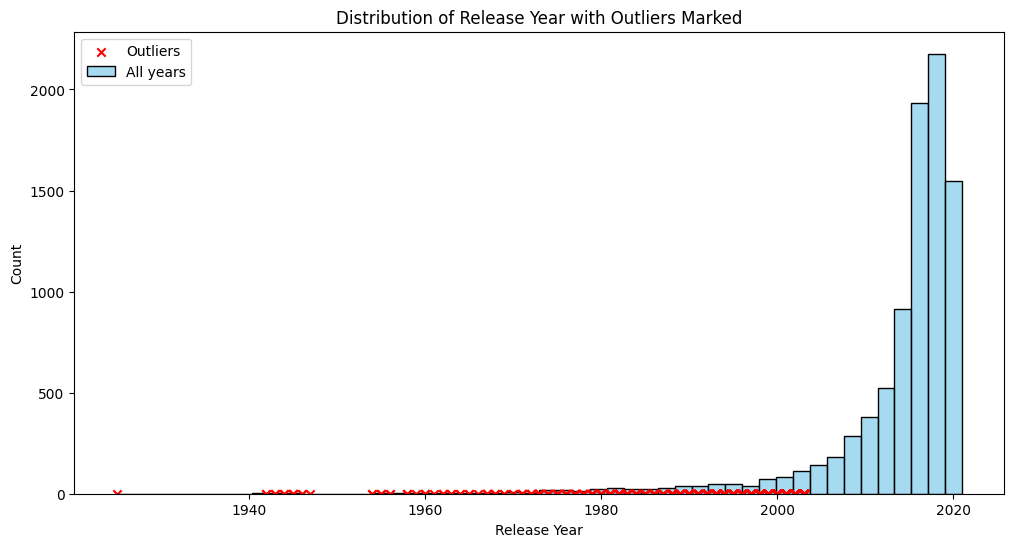

In [52]:
numeric_cols = df.select_dtypes(include=['number']).columns

print("\nOutlier detection per kolom:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['is_outlier'] = (df['release_year'] < lower_bound) | (df['release_year'] > upper_bound)

plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=50, kde=False, color='skyblue', label='All years')

outliers = df[df['is_outlier']]
plt.scatter(outliers['release_year'], [0]*len(outliers), color='red', label='Outliers', marker='x')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Year with Outliers Marked')
plt.legend()
plt.show()


## Data Preparation

### Data Preprocessing

#### Menghapus Missing Value

Kode ini mendefinisikan dan menerapkan fungsi untuk menghapus missing value pada fitur type, description dan listed in. dikarenakan saya akan membuat rekomendasi content-based filtering berdasarkan fitur tersebut. untuk hasilnya tidak ada yang terpotong.

In [11]:
df_cleaned = df.dropna(subset=['type', 'description', 'listed_in'])
print("Data setelah menghapus outlier:", df_cleaned.shape)

Data setelah menghapus outlier: (8807, 12)


Untuk fitur type, description, dan listed_in saya gabung dikarenakan TfidfVectorizer hanya bisa di-fit ke satu kolom teks. sehingga untuk fitur genre, type, description, dll, akan saya gabungkan dulu menjadi satu string panjang yang mewakili isi/identitas item. Untuk Content-based filtering sendiri bertujuan untuk merekomendasikan item berdasarkan kemiripan deskripsi/karakteristik kontennya

In [12]:
df_cleaned['content'] = df_cleaned['type'] + " " + df_cleaned['listed_in'] + " " + df_cleaned['description']
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie Documentaries As her father nears the en...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","TV Show International TV Shows, TV Dramas, TV ..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"TV Show Crime TV Shows, International TV Shows..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","TV Show Docuseries, Reality TV Feuds, flirtati..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"TV Show International TV Shows, Romantic TV Sh..."


#### TF-IDF vektorisasi
Kode di bawah ini digunakan untuk mengubah teks menjadi numerik agar bisa digunakan untuk menghitung kemiripan antar item dalam sistem rekomendasi berbasis konten. Di sini digunakan TF-IDF Vectorizer dari scikit-learn, yang mengubah setiap dokumen teks menjadi vektor angka berdasarkan bobot kata-kata yang muncul di teks tersebut. Parameter stop_words='english' digunakan untuk menghilangkan kata-kata umum seperti "the", "and", "is", yang tidak memiliki makna penting. dan juga ada parameter max_features yang diatur pada 5000 saja untuk membatasi fitur dari TF-IDF

In [13]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_cleaned['content'])

## Modelling

Sistem rekomendasi ini menggunakan pendekatan **Content-Based Filtering**, yaitu memberikan rekomendasi berdasarkan kemiripan karakteristik antar item.


#### Cosine Similarity
Baris kode ini digunakan untuk menghitung skor kemiripan (similarity score) antar setiap konten yang ada dalam dataset.cosine_similarity menerima dua buah matriks TF-IDF. Hasilnya adalah matriks simetri  menunjukkan kemiripan konten antara item satu dan lainnya. Nilai cosine similarity berada di rentang 0 sampai 1, 1 yang berarti sangat mirip dan 0 yang berarti tidak mirip sama sekali

In [14]:
cosine_sim = cosine_similarity(tfidf_matrix)

#### Indeks berdasar judul
Baris kode ini membuat sebuah mapping dari judul ke indeks baris dataframe, yang akan digunakan untuk mencari rekomendasi berdasarkan nama judul dan drop_duplicates digunakan untuk menghindari error jika ada judul yang sama sehingga hanya mengambil satu versi saja.

In [15]:
indices = pd.Series(df.index, index=df_cleaned['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

#### Fungsi get_recommendations()
Fungsi get_recommendations() digunakan untuk memberikan top_n = 10 atau 10 rekomendasi konten yang paling mirip berdasarkan deskripsi, genre, dan tipe konten dari judul yang diberikan/diinputkan. Dengan memanfaatkan cosine similarity dengan representasi TF-IDF, sistem ini mengukur kemiripan antar item secara tekstual dan mengembalikannya dalam bentuk judul, genre, dan deskripsi. Dan ketika judul yang dimasukkan tidak ada dalam daftar film netflix maka akan diberikan 'Judul tidak ditemukan.

In [16]:
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    if title not in indices:
        return "Judul tidak ditemukan."
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:top_n+1]
    
    recommendations = []
    for i, score in sim_scores:
        film_info = df_cleaned.iloc[i][['title', 'listed_in', 'type', 'description']]
        film_info['similarity'] = round(score, 4)
        recommendations.append(film_info)
    
    return pd.DataFrame(recommendations)


Hasil dari get_recommendation untuk film Kota Factory terpilih top 10 film yang hampir mirip dengan film Kota Factory, hal ini mirip dari segi genre, maupun tipe dan deskripsinya. 

In [66]:
get_recommendations("Kota Factory").reset_index()

,index,title,listed_in,type,description,similarity
0,7632,"O-Negative, Love Can’t Be Designed","International TV Shows, Romantic TV Shows, TV ...",TV Show,Five schoolmates who share a blood type naviga...,0.3630
1,3461,Cheese in the Trap,"International TV Shows, Korean TV Shows, Roman...",TV Show,"In this adaptation of a popular webtoon, a poo...",0.3404
2,4265,Single Ladies Senior,"International TV Shows, Romantic TV Shows, TV ...",TV Show,Four best friends and spirited career women na...,0.3040
3,805,Racket Boys,"International TV Shows, TV Comedies, TV Dramas",TV Show,A city kid is brought to the countryside by hi...,0.3006
4,2362,The Politician,"TV Comedies, TV Dramas, Teen TV Shows",TV Show,Rich kid Payton has always known he's going to...,0.2958
5,8165,Teresa,"International TV Shows, Romantic TV Shows, Spa...",TV Show,"We all want so much more than we have, but how...",0.2884
6,2631,My Secret Romance,"International TV Shows, Korean TV Shows, Roman...",TV Show,A nutritionist gets entangled in a series of m...,0.2841
7,8334,The Great Train Robbery,"British TV Shows, Crime TV Shows, Internationa...",TV Show,This two-part tale delivers the true story of ...,0.2839
8,3130,"Crazy, Lovely, Cool","International TV Shows, TV Dramas",TV Show,"For a group of charismatic undergraduates, the...",0.2789
9,3640,My First First Love,"International TV Shows, Korean TV Shows, Roman...",TV Show,"Due to various personal reasons, a group of Yu...",0.2785


## Evaluasi

#### Hasil Evaluasi Model Manual
Baris kode ini menginisialisasi variabel nama dengan Narcos yang nantinya akan digunakan untuk mencari rekomendasi film. Selain itu baris ini juga menampilkan hasil dari film narcos beruba judul, genre, deskripsi dan tipe. 

In [41]:
nama = "Narcos"
df[df['title'] == nama][['title', 'listed_in', 'description', 'type']]


,title,listed_in,description,type
5305,Narcos,"Crime TV Shows, TV Action & Adventure, TV Dramas",The true story of Colombia's infamously violen...,TV Show


Baris kode ini menjalankan fungsi get_recommendations() untuk judul "Narcos", dan mengembalikan 10 konten lain yang paling mirip secara konten dengan "Narcos". ketika fungsi dijalankan maka sistem akan mengecek apakah judul terdapat di film yang ada di netflix, kemudian mengambil similiarity yang paling tinggi nilainya kemudian mengambil 10 konten yang nilainya paling tinggi. 

Dengan menampilkan output berupa judul yang berisi konten yang mirip dengan "Narcos"

In [40]:
get_recommendations(nama)

,title,listed_in,type,description,similarity
8424,The Ministry of Time,"International TV Shows, Spanish-Language TV Sh...",TV Show,Three officers from different eras work for a ...,0.3041
4366,Fugitiva,"Crime TV Shows, International TV Shows, Spanis...",TV Show,A domestic abuse survivor orchestrates an elab...,0.2990
8165,Teresa,"International TV Shows, Romantic TV Shows, Spa...",TV Show,"We all want so much more than we have, but how...",0.2987
109,La casa de papel,"Crime TV Shows, International TV Shows, Spanis...",TV Show,Eight thieves take hostages and lock themselve...,0.2967
715,Elite Short Stories: Nadia Guzmán,"International TV Shows, Romantic TV Shows, Spa...",TV Show,Nadia feels conflicted about whether or not to...,0.2839
5514,Mar de Plástico,"Crime TV Shows, International TV Shows, Spanis...",TV Show,In a town in southern Spain where racial tensi...,0.2750
165,Oldsters,"Crime TV Shows, International TV Shows, Spanis...",TV Show,Three friends in their 70s step out of retirem...,0.2738
2846,Velvet,"International TV Shows, Romantic TV Shows, Spa...",TV Show,"In 1950s Spain, the heir to a fashion house ro...",0.2720
7800,Psiconautas,"International TV Shows, Spanish-Language TV Sh...",TV Show,A Spanish con man masquerades as a therapist a...,0.2700
1840,Someone Has to Die,"Crime TV Shows, International TV Shows, Spanis...",TV Show,"In conservative 1950s Spain, the alleged relat...",0.2694


### Evaluasi model menggunakan Precision@10 dan Recall@10

#### Fungsi precision_recall() 

Fungsi ini digunakan untuk mengevaluasi kualitas hasil rekomendasi dari sistem berdasarkan input judul film atau acara. Fungsi ini menerima tiga parameter: title, relevant_keywords, dan 10 jumlah rekomendasi teratas. Fungsi akan mengambil 10 rekomendasi teratas menggunakan fungsi get_recommendations(), kemudian menghitung berapa banyak rekomendasi yang mengandung genre atau kata kunci yang dianggap relevan. Sehingga hasilnya bisa dilihat apakah sistem dapat memberikan rekomendasi yang sesuai dengan topik atau tidak. 

In [ ]:
def precision_recall(title, relevant_keywords, k=10):
    recs = get_recommendations(title)
    relevant_count = 0
    matched_keywords = set()

    for listed_in in recs['listed_in']:
        for keyword in relevant_keywords:
            if keyword.lower() in listed_in.lower():
                matched_keywords.add(keyword.lower())
                relevant_count += 1
                break

    precision = relevant_count / k
    recall = len(matched_keywords) / len(set([kw.lower() for kw in relevant_keywords]))
    return precision, recall


Variabel titles_and_keywords merupakan variabel yang berisi daftar judul tayangan yang digunakan untuk evaluasi sistem rekomendasi menggunakan precision@10 dan recall@10 yang dilengkapi dengan genre setiap judul. Misalnya, judul "Narcos" dihubungkan dengan genre seperti "Crime TV Shows", "TV Action & Adventure", dan "TV Dramas", yang mencerminkan tema dan jenis tayangan dari konten tersebut. Daftar ini digunakan sebagai acuan relevansi saat menghitung metrik evaluasi seperti Precision@10 dan Recall@10, sehingga memungkinkan sistem diukur berdasarkan kemampuannya merekomendasikan konten yang memiliki kesamaan genre dan karakteristik dengan judul input.

In [38]:
eval_results = {}
titles_and_keywords = {
    'Narcos': ['Crime TV Shows', 'TV Action & Adventure', 'TV Dramas'],
    'The Crown': ['British TV Shows', 'International TV Shows', 'TV Dramas'],
    'Jaguar': ['International TV Shows', 'Spanish-Language TV Shows', 'TV Action & Adventure']
}

Kode ini melakukan looping untuk mengevaluasi performa pencocokan antara judul dan genre dengan menghitung metrik Precision@10 dan Recall@10 menggunakan fungsi precision_recall. Hasil evaluasi setiap judul disimpan dalam dictionary eval_results lalu hasilnya ditampilkan dalam bentuk tabel DataFrame agar mudah dibaca dan dianalisis.

In [39]:
for title, keywords in titles_and_keywords.items():
    prec, rec = precision_recall(title, keywords)
    eval_results[title] = {'Precision@10': round(prec, 2), 'Recall@10': round(rec, 2)}

# Tampilkan hasil
pd.DataFrame(eval_results).T

,Precision@10,Recall@10
Narcos,1.0,0.67
The Crown,1.0,0.67
Jaguar,1.0,0.33
